<center>
    <font size="24">卷积神经网络的发展</font>
    <br>
    <br>
    <br>
    <small>肖方伟</small>
</center>

# 目录

* LeNet
* AlexNet
* VGG
* NiN
* GoogLeNet
* ResNet
* DenseNet

# LeNet

 LeNet，它是最早发布的卷积神经网络之一，因其在计算机视觉任务中的高效性能而受到广泛关注。 这个模型是由 AT&T 贝尔实验室的研究员 Yann LeCun 在1989年提出的（并以其命名），目的是识别图像中的手写数字。 当时，Yann LeCun 发表了第一篇通过反向传播成功训练卷积神经网络的研究，这项工作代表了十多年来神经网络研究开发的成果。


## 结构

 ![LeNet结构](https://zh-v2.d2l.ai/_images/lenet.svg)
 
 LeNet中的数据流。输入是手写数字，输出为10种可能结果的概率


每个卷积块中的基本单元是一个卷积层、一个 sigmoid 激活函数和平均汇聚层。请注意，虽然 ReLU 和最大汇聚层更有效，但它们在20世纪90年代还没有出现。每个卷积层使用  5×5  卷积核和一个 sigmoid 激活函数。这些层将输入映射到多个二维特征输出，通常同时增加通道的数量。第一卷积层有 6 个输出通道，而第二个卷积层有 16 个输出通道。每个  2×2  池操作（步骤2）通过空间下采样将维数减少 4 倍。卷积的输出形状由批量大小、通道数、高度、宽度决定。

为了将卷积块的输出传递给稠密块，我们必须在小批量中展平每个样本。换言之，我们将这个四维输入转换成全连接层所期望的二维输入。这里的二维表示的第一个维度索引小批量中的样本，第二个维度给出每个样本的平面向量表示。LeNet 的稠密块有三个全连接层，分别有 120、84 和 10 个输出。因为我们仍在执行分类，所以输出层的 10 维对应于最后输出结果的数量。

## 实现

```python
# 用python实现模型的关键代码
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))
```

## 测试结果

将上述模型应用在Fashion-Mnist数据集上得到的结果如下图。

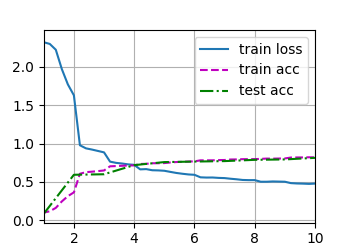

```
loss 0.473, train acc 0.821, test acc 0.804
38453.1 examples/sec on gpu(0)
```

卷积神经网络（CNN）是一类使用卷积层的网络。

在卷积神经网络中，我们组合使用卷积层、非线性激活函数和汇聚层。

为了构造高性能的卷积神经网络，我们通常对卷积层进行排列，逐渐降低其表示的空间分辨率，同时增加通道数。

在传统的卷积神经网络中，卷积块编码得到的表征在输出之前需由一个或多个全连接层进行处理。

LeNet是最早发布的卷积神经网络之一。

# AlexNet

2012年，AlexNet横空出世。它首次证明了学习到的特征可以超越手工设计的特征。它一举打破了计算机视觉研究的现状。 AlexNet使用了8层卷积神经网络，并以很大的优势赢得了2012年ImageNet图像识别挑战赛。

AlexNet第一层学习到的特征抽取器
![](https://zh-v2.d2l.ai/_images/filters.png)

## 结构

从LeNet（左）到AlexNet（right）
![](https://zh-v2.d2l.ai/_images/alexnet.svg)

AlexNet和LeNet的设计理念非常相似，但也存在显著差异。 首先，AlexNet比相对较小的LeNet5要深得多。 AlexNet由八层组成：五个卷积层、两个全连接隐藏层和一个全连接输出层。 其次，AlexNet使用ReLU而不是sigmoid作为其激活函数。

## 模型设计

在AlexNet的第一层，卷积窗口的形状是  11×11 。 由于ImageNet中大多数图像的宽和高比MNIST图像的多10倍以上，因此，需要一个更大的卷积窗口来捕获目标。 第二层中的卷积窗口形状被缩减为  5×5 ，然后是  3×3 。 此外，在第一层、第二层和第五层卷积层之后，加入窗口形状为  3×3 、步幅为2的最大汇聚层。 而且，AlexNet的卷积通道数目是LeNet的10倍。

在最后一个卷积层后有两个全连接层，分别有4096个输出。 这两个巨大的全连接层拥有将近1GB的模型参数。 由于早期GPU显存有限，原版的AlexNet采用了双数据流设计，使得每个GPU只负责存储和计算模型的一半参数。 幸运的是，现在GPU显存相对充裕，所以我们现在很少需要跨GPU分解模型

## 激活函数

此外，AlexNet将sigmoid激活函数改为更简单的ReLU激活函数。 一方面，ReLU激活函数的计算更简单，它不需要如sigmoid激活函数那般复杂的求幂运算。 另一方面，当使用不同的参数初始化方法时，ReLU激活函数使训练模型更加容易。 当sigmoid激活函数的输出非常接近于0或1时，这些区域的梯度几乎为0，因此反向传播无法继续更新一些模型参数。 相反，ReLU激活函数在正区间的梯度总是1。 因此，如果模型参数没有正确初始化，sigmoid函数可能在正区间内得到几乎为0的梯度，从而使模型无法得到有效的训练

## 容量控制和预处理

AlexNet通过dropout控制全连接层的模型复杂度，而LeNet只使用了权重衰减。 为了进一步扩充数据，AlexNet在训练时增加了大量的图像增强数据，如翻转、裁切和变色。 这使得模型更健壮，更大的样本量有效地减少了过拟合。

## 实现

```python
net = nn.Sequential(
    # 这里，我们使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过度拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10))
```

## 测试结果

将模型同样应用在Fashion-MNIST数据集上的结果如下图。
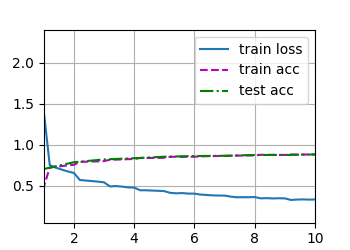

```
loss 0.334, train acc 0.878, test acc 0.874
4074.0 examples/sec on gpu(0)
```

AlexNet的结构与LeNet相似，但使用了更多的卷积层和更多的参数来拟合大规模的ImageNet数据集。

今天，AlexNet已经被更有效的结构所超越，但它是从浅层网络到深层网络的关键一步。

尽管AlexNet的代码只比LeNet多出几行，但学术界花了很多年才接受深度学习这一概念，并应用其出色的实验结果。这也是由于缺乏有效的计算工具。

Dropout、ReLU和预处理是提升计算机视觉任务性能的其他关键步骤。

# VGG

虽然 AlexNet 证明深层神经网络卓有成效，但它没有提供一个通用的模板来指导后续的研究人员设计新的网络。

与芯片设计中工程师从放置晶体管到逻辑元件再到逻辑块的过程类似，神经网络结构的设计也逐渐变得更加抽象。研究人员开始从单个神经元的角度思考问题，发展到整个层次，现在又转向模块，重复各层的模式。

使用块的想法首先出现在牛津大学的 视觉几何组（visualgeometry Group） (VGG)的 VGG网络 中。通过使用循环和子程序，可以很容易地在任何现代深度学习框架的代码中实现这些重复的结构。

## VGG块

经典卷积神经网络的基本组成部分是下面的这个序列： 1. 带填充以保持分辨率的卷积层； 1. 非线性激活函数，如ReLU； 1. 汇聚层，如最大汇聚层。

而一个 VGG 块与之类似，由一系列卷积层组成，后面再加上用于空间下采样的最大汇聚层。在最初的 VGG 论文中，作者使用了带有  3×3  卷积核、填充为 1（保持高度和宽度）的卷积层，和带有  2×2  池化窗口、步幅为 2（每个块后的分辨率减半）的最大汇聚层

```python
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)
```

## VGG网络

与 AlexNet、LeNet 一样，VGG 网络可以分为两部分：第一部分主要由卷积层和汇聚层组成，第二部分由全连接层组成。如 图7.2.1 中所示。

![](https://zh-v2.d2l.ai/_images/vgg.svg)

VGG神经网络连续连接 图7.2.1 的几个 VGG 块（在 vgg_block 函数中定义）。其中有超参数变量 conv_arch 。该变量指定了每个VGG块里卷积层个数和输出通道数。全连接模块则与AlexNet中的相同。

原始 VGG 网络有 5 个卷积块，其中前两个块各有一个卷积层，后三个块各包含两个卷积层。 第一个模块有 64 个输出通道，每个后续模块将输出通道数量翻倍，直到该数字达到 512。由于该网络使用 8 个卷积层和 3 个全连接层，因此它通常被称为 VGG-11。

## 实现

```python
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

net = vgg(conv_arch)
````

## 测试结果

下图为VGG模型在Fashion_MNIST数据集上的测试结果。
![](https://zh-v2.d2l.ai/_images/output_vgg_4a7574_56_1.svg)

```
loss 0.175, train acc 0.935, test acc 0.927
1791.7 examples/sec on gpu(0)
```

VGG-11 使用可复用的卷积块构造网络。不同的 VGG 模型可通过每个块中卷积层数量和输出通道数量的差异来定义。

块的使用导致网络定义的非常简洁。使用块可以有效地设计复杂的网络。

在VGG论文中，Simonyan和Ziserman尝试了各种架构。特别是他们发现深层且窄的卷积（即 3×3 ）比较浅层且宽的卷积更有效。

# NiN

LeNet、AlexNet 和 VGG 都有一个共同的设计模式：通过一系列的卷积层与汇聚层来提取空间结构特征；然后通过全连接层对特征的表征进行处理。 AlexNet 和 VGG 对 LeNet 的改进主要在于如何扩大和加深这两个模块。 或者，可以想象在这个过程的早期使用全连接层。 然而，如果使用稠密层了，可能会完全放弃表征的空间结构。 网络中的网络 (NiN) 提供了一个非常简单的解决方案：在每个像素的通道上分别使用多层感知机。

## NiN 块

下图说明了 VGG 和 NiN 及它们的块之间主要结构差异。 NiN 块以一个普通卷积层开始，后面是两个  1×1  的卷积层。这两个 1×1  卷积层充当带有 ReLU 激活函数的逐像素全连接层。 第一层的卷积窗口形状通常由用户设置。 随后的卷积窗口形状固定为  1×1 。

![](https://zh-v2.d2l.ai/_images/nin.svg)

```python
def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())
```

## NiN模型

最初的 NiN 网络是在 AlexNet 后不久提出的，显然从中得到了一些启示。 NiN使用窗口形状为  11×11 、 5×5  和  3×3 的卷积层，输出通道数量与 AlexNet 中的相同。 每个 NiN 块后有一个最大汇聚层，池化窗口形状为  3×3 ，步幅为 2。

NiN 和 AlexNet 之间的一个显著区别是 NiN 完全取消了全连接层。 相反，NiN 使用一个 NiN块，其输出通道数等于标签类别的数量。最后放一个 全局平均汇聚层（global average pooling layer），生成一个多元逻辑向量（logits）。NiN 设计的一个优点是，它显著减少了模型所需参数的数量。然而，在实践中，这种设计有时会增加训练模型的时间。

```python
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # 将四维的输出转成二维的输出，其形状为(批量大小, 10)
    nn.Flatten())
```

## 测试结果

下图是NiN模型在Fashion_MNIST数据集上的测试结果。
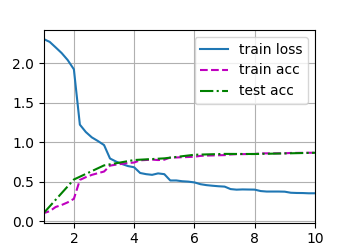

```
loss 0.384, train acc 0.858, test acc 0.879
2935.1 examples/sec on gpu(0)
```

NiN使用由一个卷积层和多个  1×1  卷积层组成的块。该块可以在卷积神经网络中使用，以允许更多的每像素非线性。

NiN去除了容易造成过拟合的全连接层，将它们替换为全局平均汇聚层（即在所有位置上进行求和）。该汇聚层通道数量为所需的输出数量（例如，Fashion-MNIST的输出为10）。

移除全连接层可减少过拟合，同时显著减少NiN的参数。

NiN的设计影响了许多后续卷积神经网络的设计。

# GoogLeNet

(含并行连结的网络)

在2014年的ImageNet图像识别挑战赛中，一个名叫GoogLeNet的网络结构大放异彩。 GoogLeNet吸收了NiN中串联网络的思想，并在此基础上做了改进。 这篇论文的一个重点是解决了什么样大小的卷积核最合适的问题。 毕竟，以前流行的网络使用小到  1×1  ，大到  11×11  的卷积核。 本文的一个观点是，有时使用不同大小的卷积核组合是有利的。

## Inception 块

在GoogLeNet中，基本的卷积块被称为Inception块（Inception block），下图为Inception块的结构。
![](https://zh-v2.d2l.ai/_images/inception.svg)


Inception块由四条并行路径组成。 前三条路径使用窗口大小为  1×1 、 3×3  和  5×5  的卷积层，从不同空间大小中提取信息。 中间的两条路径在输入上执行  1×1  卷积，以减少通道数，从而降低模型的复杂性。 第四条路径使用  3×3  最大汇聚层，然后使用  1×1  卷积层来改变通道数。 这四条路径都使用合适的填充来使输入与输出的高和宽一致，最后我们将每条线路的输出在通道维度上连结，并构成Inception块的输出。在Inception块中，通常调整的超参数是每层输出通道的数量。

```python
class Inception(nn.Module):
    # `c1`--`c4` 是每条路径的输出通道数
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # 线路1，单1 x 1卷积层
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # 线路2，1 x 1卷积层后接3 x 3卷积层
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1 x 1卷积层后接5 x 5卷积层
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3 x 3最大汇聚层后接1 x 1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        # 在通道维度上连结输出
        return torch.cat((p1, p2, p3, p4), dim=1)
 ```

## GoogLeNet模型

GoogLeNet 一共使用 9 个Inception块和全局平均汇聚层的堆叠来生成其估计值。Inception块之间的最大汇聚层可降低维度。 第一个模块类似于 AlexNet 和 LeNet，Inception块的栈从VGG继承，全局平均汇聚层避免了在最后使用全连接层。

![](https://zh-v2.d2l.ai/_images/inception-full.svg)

## 实现

```python

b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1, 1)),
                   nn.Flatten())

# GoogleNet网络
net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))
```

## 测试结果

下图为GoogLeNet模型在Fashion_MNIST数据集上的测试结果。
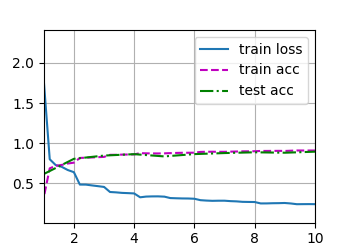

```
loss 0.243, train acc 0.907, test acc 0.895
3557.7 examples/sec on cuda:0
```

Inception 块相当于一个有4条路径的子网络。它通过不同窗口形状的卷积层和最大汇聚层来并行抽取信息，并使用  1×1  卷积层减少每像素级别上的通道维数从而降低模型复杂度。

GoogLeNet将多个设计精细的Inception块与其他层（卷积层、全连接层）串联起来。其中Inception块的通道数分配之比是在 ImageNet 数据集上通过大量的实验得来的。

GoogLeNet 和它的后继者们一度是 ImageNet 上最有效的模型之一：它以较低的计算复杂度提供了类似的测试精度。

# ResNet

随着我们设计越来越深的网络，深刻理解“新添加的层如何提升神经网络的性能”变得至关重要。更重要的是设计网络的能力，在这种网络中，添加层会使网络更具表现力， 为了取得质的突破，我们需要一些数学基础知识。

首先，假设有一类特定的神经网络结构 $\mathcal{F}$，它包括学习速率和其他超参数设置。
对于所有 $f \in \mathcal{F}$，存在一些参数集（例如权重和偏置），这些参数可以通过在合适的数据集上进行训练而获得。
现在假设 $f^*$ 是我们真正想要找到的函数，如果是 $f^* \in \mathcal{F}$，那我们可以轻而易举的训练得到它，但通常我们不会那么幸运。
相反，我们将尝试找到一个函数 $f^*_\mathcal{F}$，这是我们在 $\mathcal{F}$ 中的最佳选择。
例如，给定一个具有 $\mathbf{X}$ 特性和 $\mathbf{y}$ 标签的数据集，我们可以尝试通过解决以下优化问题来找到它：

$$f^*_\mathcal{F} := \mathop{\mathrm{argmin}}_f L(\mathbf{X}, \mathbf{y}, f) \text{ subject to } f \in \mathcal{F}.$$

那么，怎样得到更近似真正 $f^*$ 的函数呢？
唯一合理的可能性是，我们需要设计一个更强大的结构 $\mathcal{F}'$。
换句话说，我们预计 $f^*_{\mathcal{F}'}$ 比 $f^*_{\mathcal{F}}$ “更近似”。


然而，如果 $\mathcal{F} \not\subseteq \mathcal{F}'$，则无法保证新的体系“更近似”。
事实上， $f^*_{\mathcal{F}'}$ 可能更糟：
如 下图所示，对于非嵌套函数（non-nested function）类，较复杂的函数类并不总是向“真”函数 $f^*$ 靠拢（复杂度由 $\mathcal{F}_1$ 向 $\mathcal{F}_6$ 递增）。
在下图的左边，虽然 $\mathcal{F}_3$ 比 $\mathcal{F}_1$ 更接近 $f^*$，但$\mathcal{F}_6$ 却离的更远了。
相反对于右侧的嵌套函数（nested function）类 $\mathcal{F}_1 \subseteq \ldots \subseteq \mathcal{F}_6$，我们可以避免上述问题
![](http://d2l.ai/_images/functionclasses.svg)

因此，只有当较复杂的函数类包含较小的函数类时，我们才能确保提高它们的性能。
对于深度神经网络，如果我们能将新添加的层训练成 *恒等映射*（identity function） $f(\mathbf{x}) = \mathbf{x}$ ，新模型和原模型将同样有效。
同时，由于新模型可能得出更优的解来拟合训练数据集，因此添加层似乎更容易降低训练误差。

## 残差块

让我们聚焦于神经网络局部：如下图所示，假设我们的原始输入为 $x$ ，而希望学出的理想映射为 $f(\mathbf{x})$ （作为下图上方激活函数的输入）。
 左图虚线框中的部分需要直接拟合出该映射 $f(\mathbf{x})$ ，而右图虚线框中的部分则需要拟合出残差映射 $f(\mathbf{x}) - \mathbf{x}$ 。
残差映射在现实中往往更容易优化。
以本节开头提到的恒等映射作为我们希望学出的理想映射 $f(\mathbf{x})$ ，我们只需将右图虚线框内上方的加权运算（如仿射）的权重和偏置参数设成 0，那么 $f(\mathbf{x})$ 即为恒等映射。
实际中，当理想映射 $f(\mathbf{x})$ 极接近于恒等映射时，残差映射也易于捕捉恒等映射的细微波动。
右图是 ResNet 的基础结构-- *残差块*（residual block）。
在残差块中，输入可通过跨层数据线路更快地向前传播。

![一个正常块（左图）和一个残差块（右图）。](https://zh-v2.d2l.ai/_images/residual-block.svg)

ResNet 沿用了 VGG 完整的 $3\times 3$ 卷积层设计。
残差块里首先有 2 个有相同输出通道数的 $3\times 3$ 卷积层。
每个卷积层后接一个批量归一化层和 ReLU 激活函数。
然后我们通过跨层数据通路，跳过这 2 个卷积运算，将输入直接加在最后的 ReLU 激活函数前。
这样的设计要求 2 个卷积层的输出与输入形状一样，从而可以相加。
如果想改变通道数，就需要引入一个额外的 $1\times 1$ 卷积层来将输入变换成需要的形状后再做相加运算。
残差块的实现如下：

```python
class Residual(nn.Module): 
    def __init__(self, input_channels, num_channels,
                 use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)
````

此代码生成两种类型的网络：
一种是在 `use_1x1conv=False` 、应用 ReLU 非线性函数之前，将输入添加到输出。
另一种是在 `use_1x1conv=True` 时，添加通过 $1 \times 1$ 卷积调整通道和分辨率。

![](https://zh-v2.d2l.ai/_images/resnet-block.svg)

## ResNet 模型

ResNet 的前两层跟之前介绍的 GoogLeNet 中的一样： 在输出通道数为 64、步幅为 2 的  7×7  卷积层后，接步幅为 2 的  3×3  的最大汇聚层。 不同之处在于 ResNet 每个卷积层后增加了批量归一化层。

GoogLeNet 在后面接了 4 个由Inception块组成的模块。
ResNet 则使用 4 个由残差块组成的模块，每个模块使用若干个同样输出通道数的残差块。
第一个模块的通道数同输入通道数一致。
由于之前已经使用了步幅为 2 的最大汇聚层，所以无须减小高和宽。
之后的每个模块在第一个残差块里将上一个模块的通道数翻倍，并将高和宽减半。

```python
def resnet_block(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(input_channels, num_channels,
                                use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk
```

每个模块有 4 个卷积层（不包括恒等映射的  1×1  卷积层）。 加上第一个  7×7  卷积层和最后一个全连接层，共有 18 层。 因此，这种模型通常被称为 ResNet-18。 通过配置不同的通道数和模块里的残差块数可以得到不同的 ResNet 模型，例如更深的含 152 层的 ResNet-152。

![](https://zh-v2.d2l.ai/_images/resnet18.svg)

## 实现

```python
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))

b3 = nn.Sequential(*resnet_block(64, 128, 2))

b4 = nn.Sequential(*resnet_block(128, 256, 2))

b5 = nn.Sequential(*resnet_block(256, 512, 2))

net = nn.Sequential(b1, b2, b3, b4, b5,
                    nn.AdaptiveAvgPool2d((1, 1)),
                    nn.Flatten(), nn.Linear(512, 10))
```

## 测试结果

下图为ResNet-18在Fashion_MNIST数据集下的测试结果。

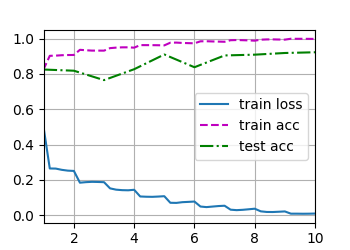

```
loss 0.015, train acc 0.996, test acc 0.914
4620.4 examples/sec on cuda:0
```

学习嵌套函数（nested function）是训练神经网络的理想情况。在深层神经网络中，学习另一层作为恒等映射（identity function）较容易（尽管这是一个极端情况）。

残差映射可以更容易地学习同一函数，例如将权重层中的参数近似为零。

利用残差块（residual blocks）可以训练出一个有效的深层神经网络：输入可以通过层间的残余连接更快地向前传播。

残差网络（ResNet）对随后的深层神经网络设计产生了深远影响，无论是卷积类网络还是全连接类网络。